<a href="https://colab.research.google.com/github/knoppin1/DATA-606-Capstone/blob/main/ipynb/203_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import pickle

In [2]:
# Read from pickle file
df = pd.read_pickle("./all_data_fips.pkl")
df.shape

(3112, 17)

In [3]:
df.head(3)

,FIPS,FIPS_Code,County,State_Abbr,State,Place,Land_Area,Population,Pop_Sq_Mile,Income,Confirmed,Cases_Sq_Mile,Deaths,Deaths_Sq_Mile,Vaccinated,Vax_Pct,Vax_Sq_Mile
0,2013,02013,Aleutians East Borough,AK,Alaska,"Aleutians East, Alaska, US",6981.94,3337,0,62537,369,0,3,0,2172,65.1,0
1,2016,02016,Aleutians West Census Area,AK,Alaska,"Aleutians West, Alaska, US",4390.28,5634,1,58008,721,0,1,0,2656,47.1,0
2,2020,02020,Anchorage Municipality,AK,Alaska,"Anchorage, Alaska, US",1704.68,288000,168,70145,31058,18,179,0,126221,43.8,74


In [4]:
df.describe()

,FIPS,Land_Area,Population,Pop_Sq_Mile,Income,Confirmed,Cases_Sq_Mile,Deaths,Deaths_Sq_Mile,Vaccinated,Vax_Pct,Vax_Sq_Mile
count,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000
mean,30282.262211,1106.374479,1.049407e+05,270.714332,45955.784062,1.061510e+04,26.421594,190.291774,0.430591,4.015677e+04,30.457584,105.849936
std,15126.815912,3610.275409,3.347700e+05,1782.779788,13144.549879,3.754849e+04,175.938025,727.551874,5.704471,1.501343e+05,15.123688,951.683493
min,1001.000000,2.000000,1.690000e+02,0.000000,19472.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,18170.500000,430.567500,1.094850e+04,16.750000,37962.000000,1.085000e+03,1.000000,20.000000,0.000000,2.198250e+03,23.500000,2.000000
50%,29160.000000,612.290000,2.607000e+04,45.000000,43431.500000,2.639000e+03,4.000000,51.000000,0.000000,6.654000e+03,31.700000,11.000000
75%,45049.500000,917.662500,6.831300e+04,118.250000,50732.750000,6.800000e+03,12.000000,121.000000,0.000000,2.162975e+04,40.500000,35.000000
max,56045.000000,145504.790000,1.003911e+07,71340.000000,229825.000000,1.247909e+06,6065.000000,24459.000000,197.000000,4.922209e+06,99.900000,42855.000000


In [5]:
florida_df = df.query("`State` == 'Florida'")
florida_df.shape

(67, 17)

In [6]:
features = [florida_df[['Pop_Sq_Mile','Cases_Sq_Mile']]]
features

[     Pop_Sq_Mile  Cases_Sq_Mile
 317          307             29
 318           49              6
 319          230             27
 320           95             10
 321          592             42
 ..           ...            ...
 379           62              7
 380          502             41
 381           55              5
 382           71              7
 383           43              4
 
 [67 rows x 2 columns]]

Reference: https://www.thiscodeworks.com/use-sklearn-standardscaler-only-on-certain-feature-columns-python/605cc55c3c8db10014203c0e

In [7]:
scaled_features = florida_df.copy()
 
col_names = ['Pop_Sq_Mile','Cases_Sq_Mile']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]

,Pop_Sq_Mile,Cases_Sq_Mile
317,-0.133347,-0.148195
318,-0.583988,-0.537240
319,-0.267841,-0.182025
320,-0.503642,-0.469580
321,0.364455,0.071699
...,...,...
379,-0.561282,-0.520325
380,0.207255,0.054784
381,-0.573508,-0.554155
382,-0.545562,-0.520325


In [33]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=0)

In [34]:
kmeans.fit(scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [35]:
# The lowest SSE (Sum of Squares Error) value
kmeans.inertia_

13.443813353871553

In [36]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.30879447,  0.21265754],
       [-0.47891639, -0.4684525 ],
       [ 3.68924782,  4.14821063],
       [ 1.90816502,  1.91881566]])

In [37]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [38]:
# Look at the label assignments
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 3, 1, 0, 0, 2, 0, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1], dtype=int32)

In [39]:
scaled_features['Label'] = labels
scaled_features[['Place','Pop_Sq_Mile','Cases_Sq_Mile','Label']]

,Place,Pop_Sq_Mile,Cases_Sq_Mile,Label
317,"Alachua, Florida, US",-0.133347,-0.148195,1
318,"Baker, Florida, US",-0.583988,-0.537240,1
319,"Bay, Florida, US",-0.267841,-0.182025,1
320,"Bradford, Florida, US",-0.503642,-0.469580,1
321,"Brevard, Florida, US",0.364455,0.071699,0
...,...,...,...,...
379,"Union, Florida, US",-0.561282,-0.520325,1
380,"Volusia, Florida, US",0.207255,0.054784,0
381,"Wakulla, Florida, US",-0.573508,-0.554155,1
382,"Walton, Florida, US",-0.545562,-0.520325,1


In [40]:
#filter rows of original data
filtered_label0 = scaled_features[scaled_features.Label == 0]
filtered_label0.shape

(15, 18)

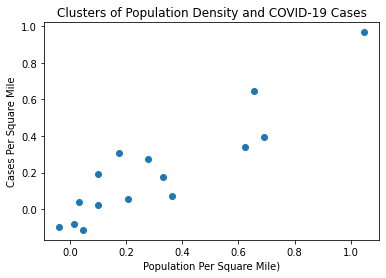

In [43]:
#plotting the results
plt.scatter(filtered_label0['Pop_Sq_Mile'], filtered_label0['Cases_Sq_Mile'])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.title('Clusters of Population Density and COVID-19 Cases')
plt.xlabel('Population Per Square Mile)')
plt.ylabel('Cases Per Square Mile')
plt.show()

In [42]:
# X = scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]
X = florida_df[['Pop_Sq_Mile','Cases_Sq_Mile']]

Reference: https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

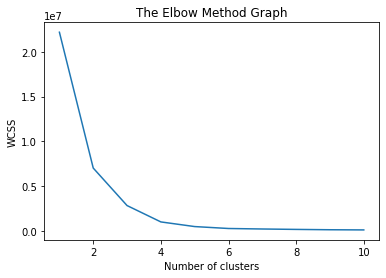

In [45]:
# Using the elbow method to find out the optimal number of clusters. 
wcss=[]

# Loop ten times to:
#  - fit the k-means algorithm to data 
#  - use kmean++ random initialization method 
#  - allow for a maximum of 300 iterations to find final clusters 
#  - run the algorithm for 10 different initial centroids 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(X)

    # Compute the WCSS (within cluster sum of squares) and append it to a WCSS list.
    wcss.append(kmeans.inertia_)

# Plot the elbow graph using the WCSS list.
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Four (4) clusters seems to be the optimum number of clusters because that is where the elbow curves

In [46]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [47]:
X['Label'] = kmeans.fit_predict(X)
X['Label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


317    1
318    1
319    1
320    1
321    0
      ..
379    1
380    0
381    1
382    1
383    1
Name: Label, Length: 67, dtype: int32

In [48]:
kmeans.cluster_centers_

array([[ 560.13333333,   50.33333333],
       [ 109.15555556,   10.06666667],
       [3560.        ,  300.        ],
       [1468.33333333,  170.33333333]])

In [21]:
X[X.Label==2][['Pop_Sq_Mile','Cases_Sq_Mile']]

,Pop_Sq_Mile,Cases_Sq_Mile
368,3560,300


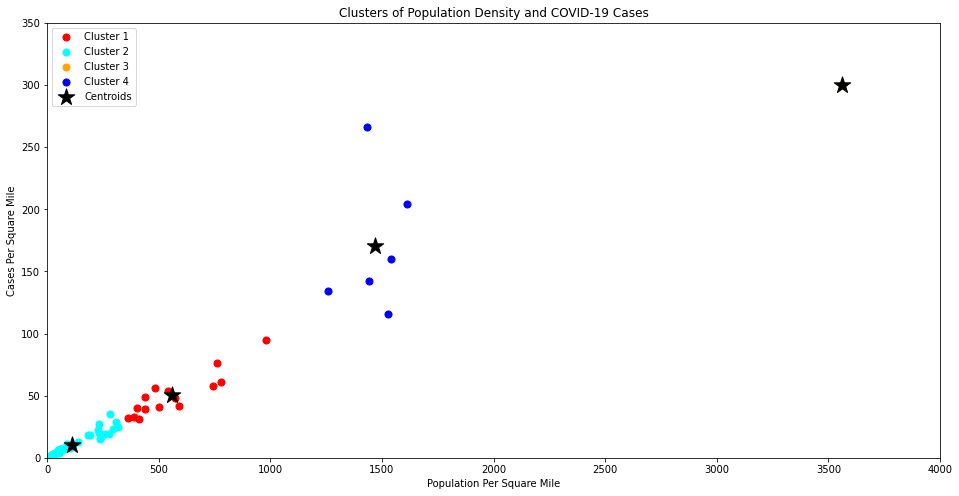

In [50]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X[X.Label==0]['Pop_Sq_Mile'], X[X.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
plt.scatter(X[X.Label==1]['Pop_Sq_Mile'], X[X.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X[X.Label==2]['Pop_Sq_Mile'], X[X.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X[X.Label==3]['Pop_Sq_Mile'], X[X.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids', marker='*')
plt.xlim(0,4000)
plt.ylim(0,350)
plt.title('Clusters of Population Density and COVID-19 Cases')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()

In [23]:
X[X.Label==2]['Pop_Sq_Mile']

368    3560
Name: Pop_Sq_Mile, dtype: int64